# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [153]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [154]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [155]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

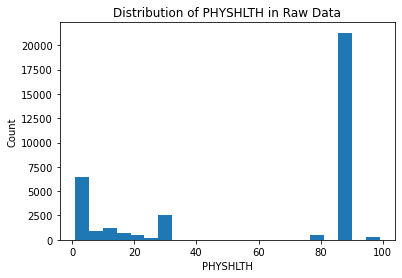

In [156]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [157]:
df["_STATE"].value_counts()

36.0    12249
34.0    11708
9.0     10588
Name: _STATE, dtype: int64

In [158]:
# Replace None with appropriate text
print("""
There are values above 30.
The pdf dictionary has the numerical codes and I have included them in the table shown below.
""")


There are values above 30.
The pdf dictionary has the numerical codes and I have included them in the table shown below.



| Value | Value Label |
| :-: | :-: |
| 1-30 | Number of Days |
| 88 | None |
| 77 | Don't know / Not Sure |
| 99 | Refused |
| BLANK | Not asked or Missing |

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [159]:
# Your code here
df.loc[df.PHYSHLTH == 88, 'PHYSHLTH'] = 0
df = df.drop(df.loc[(df.PHYSHLTH == 77) | (df.PHYSHLTH == 99)].index)
df = df.dropna(subset='PHYSHLTH')

Run the code below to ensure you have the correct, cleaned dataframe:

In [160]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [161]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

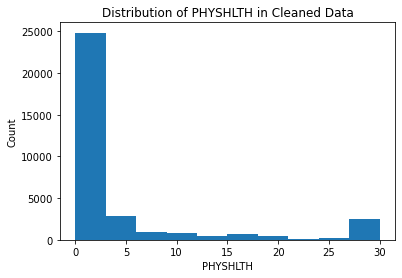

In [162]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [163]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    11876
34.0    11458
9.0     10413
Name: _STATE, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [164]:
# Your code here
df.loc[df._STATE == 36, '_STATE'] = 'New York'
df.loc[df._STATE == 34, '_STATE'] = 'New Jersey'
df.loc[df._STATE == 9, '_STATE'] = 'Connecticut'

Below, we check the values:

In [165]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

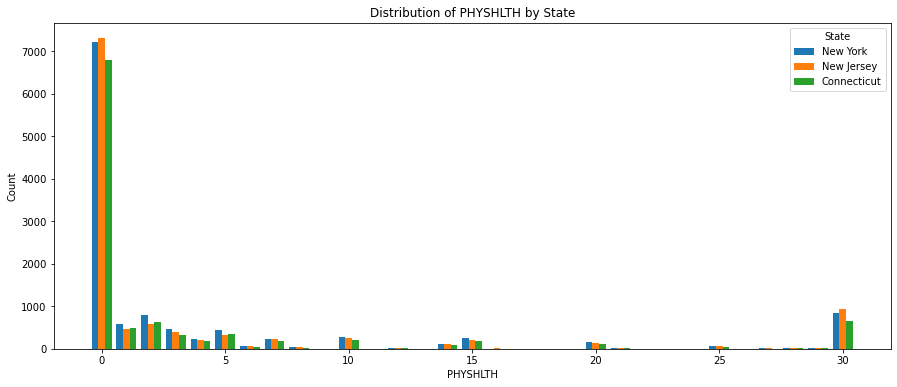

In [166]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [167]:
# Replace None with appropriate text
print("""
The overall distributions all align although there are slight variations from each state.
""")


The overall distributions all align although there are slight variations from each state.



For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [168]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [169]:
# Replace None with appropriate text
print('The ANOVA is the right choice because it allows us to see if the variance of the ' + \
      'numerical variable (the number of days of bad health in the past 30 days) of any ' + \
      'single categorial variable (out of the 3 states) varies significantly from the overall '+\
      'variance of the \033[31m\033[1mnumerical variable / three states combined.\033[0m')

The ANOVA is the right choice because it allows us to see if the variance of the numerical variable (the number of days of bad health in the past 30 days) of any single categorial variable (out of the 3 states) varies significantly from the overall variance of the numerical variable / three states combined.


Now, identify the null and alternative hypotheses:

In [170]:
# Replace None with appropriate text
print('Null: The means of PHYSHLTH do not vary significantly among the states.')
print('Alternative: The means of PHYSHLTH vary significantly among the states.')

Null: The means of PHYSHLTH do not vary significantly among the states.
Alternative: The means of PHYSHLTH vary significantly among the states.


In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [171]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [172]:
# Replace None with appropriate text
print('The calculated p-value was: ', sm.stats.anova_lm(lm).loc['C(_STATE)', 'PR(>F)'])
print('Yes we should reject the null hypothesis.')
print('The average number of days feeling unhealthy does seem to vary by state to a '+\
      'significant degree.')
print('The business should vary their offerings by state.')
print('\n')
print('\033[31m\033[4m.\033[1mTHEIR BUSINESS RECOMMENDATION:\033[0m')
print('Based on this information, we might recommend to the business that they investigate '+\
      'further why people in Connecticut have the best health and why people in New Jersey '+\
      'have the worst health out of these states.')

The calculated p-value was:  8.8006070440503e-09
Yes we should reject the null hypothesis.
The average number of days feeling unhealthy does seem to vary by state to a significant degree.
The business should vary their offerings by state.


.THEIR BUSINESS RECOMMENDATION:
Based on this information, we might recommend to the business that they investigate further why people in Connecticut have the best health and why people in New Jersey have the worst health out of these states.


With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [173]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [174]:
len(df)

33747

In [175]:
# Your code here
df.loc[df.RENTHOM1 == 1, 'RENTHOM1'] = 'Own'
df.loc[df.RENTHOM1 == 2, 'RENTHOM1'] = 'Rent'

df = df.loc[(df.RENTHOM1 == 'Own') | (df.RENTHOM1 == 'Rent')]


# THEIRS

# # Replace codes with labels
# df["RENTHOM1"].replace({1: "Own", 2: "Rent"}, inplace=True)

# # Only keep records with those labels
# df = df[df["RENTHOM1"].isin(["Own", "Rent"])].copy()

# df



len(df)

31934

In [176]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

Below, we check that this was done correctly:

In [177]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

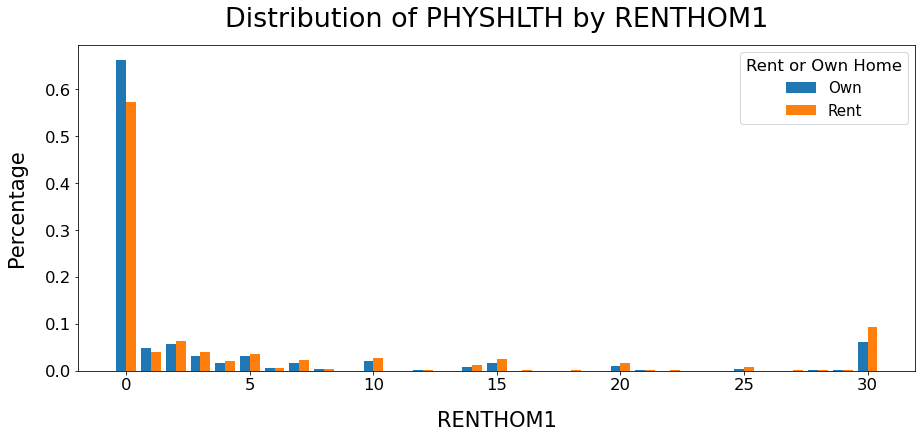

In [178]:
# Your code here
own = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
rent = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(x=[own, rent], label=["Own", "Rent"], bins=range(32), align="left", density='True')

ax.set_xlabel("RENTHOM1", size=21, labelpad=18)
ax.set_ylabel("Percentage", size=21, labelpad=18)
ax.set_title("Distribution of PHYSHLTH by RENTHOM1", size=27, pad=18)
ax.tick_params('both', labelsize=16.5)

ax_leg = ax.legend(prop={'size':15})
ax_leg.set_title(title="Rent or Own Home", prop={'size':16.5})

Then run this code to find the averages:

In [179]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [180]:
# Replace None with appropriate text
print('While there does seem to be a similar distribution among the owners and renters, ' +\
      'the renters are consistently higher in reporting having more than two bad health days ' +\
      'out of the past 30.  The difference is most stark at both end of the spectrum.  Those '+\
      'who own were much more likely to report zero bad health days in the past month, ' +
      'while those who rent were more likely to report having a full month of '+\
      'bad health days.  The states had a more even distribution.  You can see the difference '+\
      'in the difference between the means of the states and the difference between the '+\
      'owners and renters.')

While there does seem to be a similar distribution among the owners and renters, the renters are consistently higher in reporting having more than two bad health days out of the past 30.  The difference is most stark at both end of the spectrum.  Those who own were much more likely to report zero bad health days in the past month, while those who rent were more likely to report having a full month of bad health days.  The states had a more even distribution.  You can see the difference in the difference between the means of the states and the difference between the owners and renters.


Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [181]:
# Your code here (create additional cells as needed)
print('As there is only two categories vs one numerical, we could use a simple t-test, '+\
      'and since we can already see that renters seem to have more bad days on average and '+\
      'by the distribution, we should use a one-tail t-test.')
print()
print('Null: The mean number of bad health days is not significantly different for renters vs '+\
      'owners.')
print('Alternative: The mean number of bad health days is significantly higher for those who '+\
      'rent vs those who own.')

As there is only two categories vs one numerical, we could use a simple t-test, and since we can already see that renters seem to have more bad days on average and by the distribution, we should use a one-tail t-test.

Null: The mean number of bad health days is not significantly different for renters vs owners.
Alternative: The mean number of bad health days is significantly higher for those who rent vs those who own.


In [182]:
import scipy.stats as stats

pval = stats.ttest_ind(rent, own, equal_var=False).pvalue / 2 

In [183]:
print('The calculated p-value was: ', pval)
print('Yes we should reject the null hypothesis.')
print('The average number of days feeling bad is significantly higher for those who rent than '+\
      'for those who own.')
print('More study is needed to find out why this is to see if the business'+\
      ' could do anything to address it.')

The calculated p-value was:  5.394649320817826e-54
Yes we should reject the null hypothesis.
The average number of days feeling bad is significantly higher for those who rent than for those who own.
More study is needed to find out why this is to see if the business could do anything to address it.


## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [184]:
df.SMOKE100 = df.SMOKE100.map(lambda x: 1 if x==1 else 0 if not np.isnan(x) else x)

<ipython-input-184-92bf3f5a5bb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SMOKE100 = df.SMOKE100.map(lambda x: 1 if x==1 else 0 if not np.isnan(x) else x)


In [185]:
df.USENOW3 = df.USENOW3.map(lambda x: 1 if x in [1, 2] else 0 if not np.isnan(x) else x)

<ipython-input-185-7418f7650ebf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.USENOW3 = df.USENOW3.map(lambda x: 1 if x in [1, 2] else 0 if not np.isnan(x) else x)


In [186]:
df.ECIGARET = df.ECIGARET.map(lambda x: 1 if x==1 else 0 if not np.isnan(x) else x)

<ipython-input-186-e7d205b9e838>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ECIGARET = df.ECIGARET.map(lambda x: 1 if x==1 else 0 if not np.isnan(x) else x)


In [187]:
# Your code here
df['NICOTINE_USE'] = \
df.apply(lambda x: 1 if x['SMOKE100']==1 or x['USENOW3']==1 or x['ECIGARET']==1 else 0, axis=1)

# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

<ipython-input-187-d6f5dd1e600f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NICOTINE_USE'] = \


0    0.563036
1    0.436964
Name: NICOTINE_USE, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [188]:
# Your code here
df['CHRONIC'] = df.PHYSHLTH.map(lambda x: 1 if x >= 15 else 0)


# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

<ipython-input-188-289d947d751e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CHRONIC'] = df.PHYSHLTH.map(lambda x: 1 if x >= 15 else 0)


0    28246
1     3688
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [189]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,16332,11914
1,1648,2040


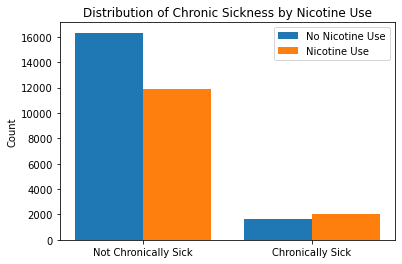

In [190]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [191]:
# Your code here (create additional cells as needed)
print('A chi-squared test is appropriate as we are testing proportions of two categories vs '+\
      'two categories.')
print()
print('Null: The proportion of the number of people feeling chronically ill is not related '+\
      'to nicotine use.')
print('Alternative: The proportion of the number of people feeling chronically ill is '+\
      'related to nicotine use.')

A chi-squared test is appropriate as we are testing proportions of two categories vs two categories.

Null: The proportion of the number of people feeling chronically ill is not related to nicotine use.
Alternative: The proportion of the number of people feeling chronically ill is related to nicotine use.


In [192]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print('chi-squared p-val: ', p)

chi-squared p-val:  1.4525226945056695e-51


In [193]:
print('This is much less than the alpha of .05 so there is a siginificant relationship '+\
      'between nicotine use and chronic illness.  We can reject the null hypothesis.')

This is much less than the alpha of .05 so there is a siginificant relationship between nicotine use and chronic illness.  We can reject the null hypothesis.


In [194]:
contingency_table.index = ['0 (actual)', '1 (actual)']

expected_table = pd.DataFrame(expected)
expected_table.index = ['0 (expected)', '1 (expected)']

final_table = pd.concat([contingency_table, expected_table])

final_table.columns.name = 'NICOTINE_USE'
final_table.index.name = 'CHRONIC'

final_table

NICOTINE_USE,0,1
CHRONIC,,
0 (actual),16332.000000,11914.000000
1 (actual),1648.000000,2040.000000
0 (expected),15903.522265,12342.477735
1 (expected),2076.477735,1611.522265


In [195]:
print('We should see more people not using nicotine who feel chronically ill than those who '+\
      'use nicotine but we see the reverse.  This does not prove a causal link but the fact '+\
      'that we saw more people feeling chronically ill who use nicotine than those who do not '+\
      'means that there is defintely a link.')

We should see more people not using nictone who feel chronically ill than those who use nicotine but we see the reverse.  This does not prove a causal link but the fact that we saw more people feeling chronically ill who use nicotine than those who do not means that there is defintely a link.


## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

In [196]:
# COLUMNS I WANTED TO CHECK OUT 
######################################
# EMPLOY1 - Employment Status
# INCOME2 - Household Income - Income Level
# SLEPTIM1 - Average Hours of Sleep / How much time do you sleep
# EXERANY2 - Any Physical Activity or Exercise in past 30 days
# _PACAT1 - Physical Activity Categories
# MARIJANA - During the past 30 days have many days did you use marijuana or hashish
# EMTSUPRT - How often do you get the emotional support you need
# LSATISFY - In general, how satisfied are you with your life
# SDHSTRES - How often have you felt this kind of stress
# ADDEPEV2 - Ever been told you have a depressive order

df = df[['PHYSHLTH', 'EMPLOY1', 'INCOME2', 'SLEPTIM1', 'EXERANY2', '_PACAT1', 'MARIJANA', 
        'EMTSUPRT', 'LSATISFY', 'SDHSTRES', 'ADDEPEV2']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31934 entries, 49938 to 303778
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PHYSHLTH  31934 non-null  float64
 1   EMPLOY1   31934 non-null  float64
 2   INCOME2   31654 non-null  float64
 3   SLEPTIM1  0 non-null      float64
 4   EXERANY2  29251 non-null  float64
 5   _PACAT1   31934 non-null  float64
 6   MARIJANA  0 non-null      float64
 7   EMTSUPRT  0 non-null      float64
 8   LSATISFY  0 non-null      float64
 9   SDHSTRES  0 non-null      float64
 10  ADDEPEV2  31934 non-null  float64
dtypes: float64(11)
memory usage: 2.9 MB


In [197]:
df = df.drop(columns=['SLEPTIM1', 'MARIJANA', 'EMTSUPRT', 'LSATISFY', 'SDHSTRES'])

In [198]:
for col in df.columns[1:]:
    print(col, df[col].unique())

EMPLOY1 [1. 2. 6. 7. 3. 4. 5. 8. 9.]
INCOME2 [ 7.  8. 77.  4. 99.  2.  6.  1.  3.  5. nan]
EXERANY2 [ 1.  2. nan  7.  9.]
_PACAT1 [3. 1. 4. 2. 9.]
ADDEPEV2 [1. 2. 9. 7.]


In [199]:
df = df[['PHYSHLTH', '_PACAT1']].copy()
df.loc[df._PACAT1==1, '_PACAT1'] = 'Highly Active'
df.loc[df._PACAT1==2, '_PACAT1'] = 'Active'
df.loc[df._PACAT1==3, '_PACAT1'] = 'Insufficientlly Active'
df.loc[(df._PACAT1==4) | (df._PACAT1==9), '_PACAT1'] = 'Not Active'
df._PACAT1.value_counts()

Not Active                12219
Highly Active              9234
Active                     5302
Insufficientlly Active     5179
Name: _PACAT1, dtype: int64

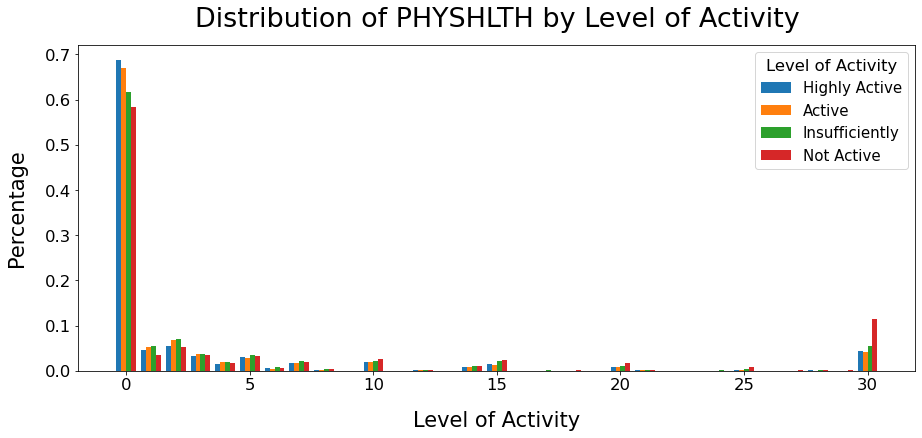

In [200]:
# Your code here
high_act = df.loc[df._PACAT1 == "Highly Active", "PHYSHLTH"]
norm_act = df.loc[df._PACAT1 == "Active", "PHYSHLTH"]
low_act = df.loc[df._PACAT1 == "Insufficientlly Active", "PHYSHLTH"]
no_act = df.loc[df._PACAT1 == "Not Active", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(x=[high_act, norm_act, low_act, no_act], 
        label=["Highly Active", "Active", 'Insufficiently', 'Not Active'], 
        bins=range(32), align="left", density='True')

ax.set_xlabel("Level of Activity", size=21, labelpad=18)
ax.set_ylabel("Percentage", size=21, labelpad=18)
ax.set_title("Distribution of PHYSHLTH by Level of Activity", size=27, pad=18)
ax.tick_params('both', labelsize=16.5)

ax_leg = ax.legend(prop={'size':15})
ax_leg.set_title(title="Level of Activity", prop={'size':16.5})

In [201]:
df.groupby('_PACAT1').mean()

,PHYSHLTH
_PACAT1,
Active,2.791777
Highly Active,2.871345
Insufficientlly Active,3.645298
Not Active,5.699730


In [202]:
print('There does seem to be a relationship between level of activity outside of work and '+\
      'the number of days of bad health.  Due to the number of categories it was appropraite '+\
      'to use an ANOVA test again.')
print('\n')
print('Null: The number of days with bad physical health is not related to level of activity '+\
      'outside of work.')
print('Alt: The number of days with bad physical health is related to level of activity '+\
      'outside of work.')

There does seem to be a relationship between level of activity outside of work and the number of days of bad health.  Due to the number of categories it was appropraite to use an ANOVA test again.


Null: The number of days with bad physical health is not related to level of activity outside of work.
Alt: The number of days with bad physical health is related to level of activity outside of work.


In [203]:
formula = 'PHYSHLTH ~ C(_PACAT1)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_PACAT1),3.0,5.531737e+04,18439.124869,261.799893,7.263520e-168
Residual,31930.0,2.248898e+06,70.432133,NaN,NaN


In [206]:
print('We can reject the null hypothesis, there is a relationship between level of activity '+\
      'and physical health.  Unfortunately, we do not know if the poor physical health was '+\
      'the cause of the low or non existent levels of activity or vice versa.  Also, the '+\
      'we do not know if activity was the cause of the bad physical health day to begin with.'+\
      '  The PAINACT2 column would have been good to provide more information in this regard '+\
      'although additonal informationa and research would also be required.')

We can reject the null hypothesis, there is a relationship between level of activity and physical health.  Unfortunately, we do not know if the poor physical health was the cause of the low or non existent levels of activity or vice versa.  Also, the we do not know if activity was the cause of the bad physical health day to begin with.  The PAINACT2 column would have been good to provide more information in this regard although additonal informationa and research would also be required.


## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.